# kaggleフォーマット

In [1]:
import numpy as np
import pandas as pd

csvファイル読み込み

In [2]:
train=pd.read_csv('../input/titanic/train.csv')
test=pd.read_csv('../input/titanic/test.csv')
#gender_submission=pd.read_csv("../input/titanic/gender_submission.csv")

In [3]:
data=pd.concat([train,test],sort=False)

In [4]:
data.isnull().sum()


PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

データの定量化

In [5]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)

In [6]:
data['Embarked'].fillna('S',inplace=True)
data['Embarked']=data['Embarked'].map({'S':0,'C':1,'Q':2}).astype(int)

In [7]:
data['Fare'].fillna(np.mean(data['Fare']),inplace=True)

In [8]:
age_avg=data['Age'].mean()
age_std=data['Age'].std()
data['Age'].fillna(np.random.randint(age_avg-1.96*age_std,age_avg+1.96*age_std),inplace=True)

In [9]:
data['Family']=data['SibSp']+data['Parch']+1
data.drop(['SibSp'],axis=1)
data.drop(['Parch'],axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Ticket,Fare,Cabin,Embarked,Family
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,A/5 21171,7.2500,NaN,0,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,PC 17599,71.2833,C85,1,2
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,113803,53.1000,C123,0,2
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,373450,8.0500,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",0,44.0,0,A.5. 3236,8.0500,NaN,0,1
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,PC 17758,108.9000,C105,1,1
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,SOTON/O.Q. 3101262,7.2500,NaN,0,1
416,1308,NaN,3,"Ware, Mr. Frederick",0,44.0,0,359309,8.0500,NaN,0,1


In [10]:
from sklearn.preprocessing import OneHotEncoder
'''
#IneHotEncoderのencoding
ohe=OneHotEncoder(sparse=False,categories='auto')
origin_cols=[]
ohe.fit(data[origin_cols])

#ダミー変数の列名も作成
columns=[]
for i,c in enumerate(origin_cols):
    columns+=[f'{c}_{v}' for v in ohe.categories_[i]]

#生成されたダミー変数をデータフレームに変換
dummy_data=pd.DataFrame(ohe.transform(data[origin_cols]),columns=columns,index=data.index)

#元のデータと結合
data=pd.concat([data.drop(origin_cols,axis=1),dummy_data],axis=1)
'''

"\n#IneHotEncoderのencoding\nohe=OneHotEncoder(sparse=False,categories='auto')\norigin_cols=[]\nohe.fit(data[origin_cols])\n\n#ダミー変数の列名も作成\ncolumns=[]\nfor i,c in enumerate(origin_cols):\n    columns+=[f'{c}_{v}' for v in ohe.categories_[i]]\n\n#生成されたダミー変数をデータフレームに変換\ndummy_data=pd.DataFrame(ohe.transform(data[origin_cols]),columns=columns,index=data.index)\n\n#元のデータと結合\ndata=pd.concat([data.drop(origin_cols,axis=1),dummy_data],axis=1)\n"

In [11]:
delete_columns=['Name','PassengerId','Ticket','Cabin']
data.drop(delete_columns,axis=1,inplace=True)

In [12]:
#カテゴリー変数を格納する
categorical_features=['Embarked','Pclass','Sex']

トレーニングデータとテストデータに戻す

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_feature(train):
    y_sub='Survived'
    columns=data.columns.values.tolist()
    print(columns)
    columns.remove(y_sub)
    for val in columns:
        value_list=set(train[val].astype('category').values)
        print(len(value_list))
        if len(value_list)<8:
            sns.countplot(x=val, hue=y_sub, data=train)
            plt.legend(loc='upper right', title=y_sub)
            plt.show()
        else:
            plt.hist(train.loc[train[y_sub] == 0, val].dropna(), bins=20, alpha=0.5, label='0')
            plt.hist(train.loc[train[y_sub] == 1, val].dropna(), bins=20, alpha=0.5, label='1')
            plt.xlabel(val)
            plt.ylabel('count')
            plt.legend(title=y_sub)
            plt.show()

['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Family']
3


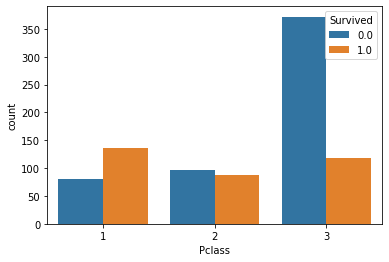

2


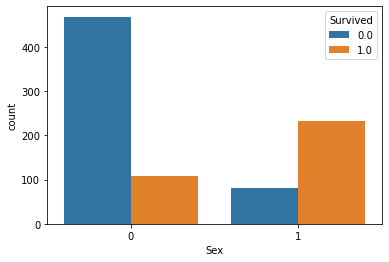

88


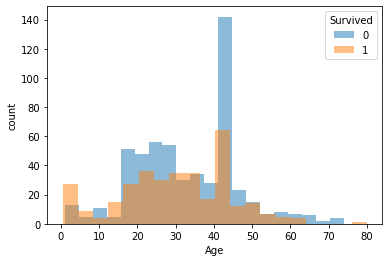

7


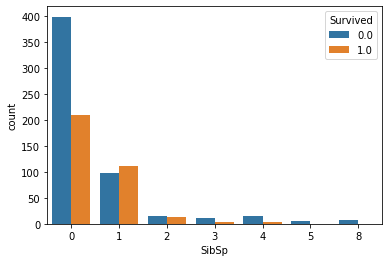

7


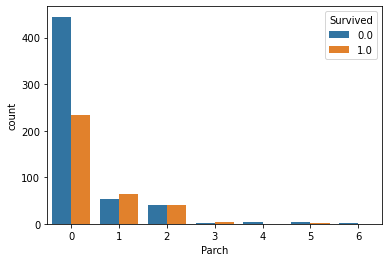

248


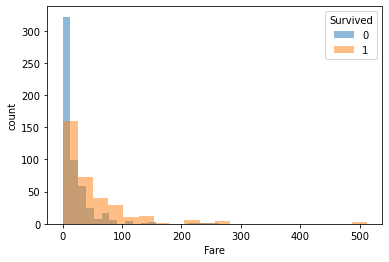

3


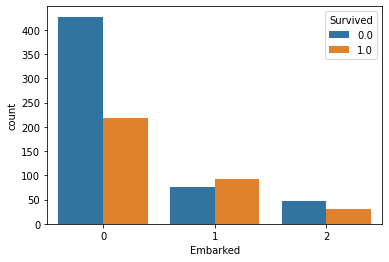

9


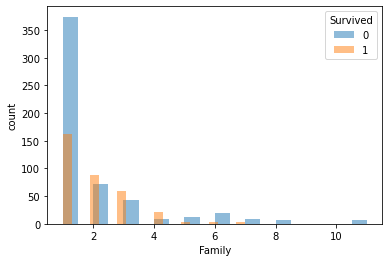

In [14]:
train=data[:len(train)]
test=data[len(train):]
train_copy=pd.DataFrame()
train_copy=train.copy()

#特徴量可視化
plot_feature(train)

y_train=train['Survived']

del train['Survived']
x_train=train

#y_test=gender_submission['Survived']

del test['Survived']
x_test=test

In [15]:
type(train)
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,3,0,22.0,1,0,7.2500,0,2
1,1,1,38.0,1,0,71.2833,1,2
2,3,1,26.0,0,0,7.9250,0,1
3,1,1,35.0,1,0,53.1000,0,2
4,3,0,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...
886,2,0,27.0,0,0,13.0000,0,1
887,1,1,19.0,0,0,30.0000,0,1
888,3,1,44.0,1,2,23.4500,0,4
889,1,0,26.0,0,0,30.0000,1,1


In [16]:
np_x_train=x_train.to_numpy()
np_y_train=y_train.to_numpy()
np_x_test=x_test.to_numpy()
#np_y_test=y_test.to_numpy()


# 重要度を求める

In [17]:
from sklearn.ensemble import RandomForestClassifier

feat_labels=x_train.columns[:]
forest=RandomForestClassifier(n_estimators=10000,random_state=0,n_jobs=-1)
#モデルの適合
forest.fit(x_train,y_train)
importances=forest.feature_importances_
#重要度の降順で特徴量のインデックスを抽出
indices=np.argsort(importances)[::-1]

 1) Fare                           0.264840
 2) Age                            0.255666
 3) Sex                            0.255262
 4) Pclass                         0.081339
 5) Family                         0.052726
 6) Embarked                       0.033622
 7) SibSp                          0.030975
 8) Parch                          0.025570


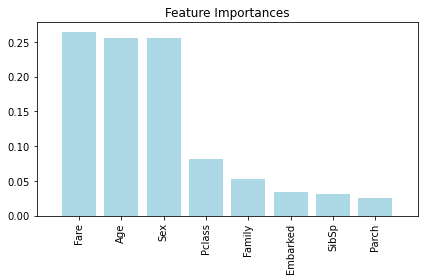

In [18]:
import matplotlib.pyplot as plt
#重要度を降順で表示
for f in range(np_x_train.shape[1]):
    print("%2d) %-*s %f"%(f+1,30,
                         feat_labels[indices[f]],
                         importances[indices[f]]))
plt.title('Feature Importances')
plt.bar(range(np_x_train.shape[1]),
      importances[indices],
      color='lightblue',
      align='center')
plt.xticks(range(np_x_train.shape[1]),
          feat_labels[indices],rotation=90)
plt.xlim([-1,np_x_train.shape[1]])
plt.tight_layout()
plt.show()

重要度が低い特徴量を削除する

In [19]:
sita=0.05

feature_list=list(feat_labels[indices[:]].values.flatten())
importance_list=list(importances[indices[:]])

new_train=train
new_test=test
for i in range(len(train.columns)):
    if importance_list[i]<sita:
        del new_train[feature_list[i]]
        del new_test[feature_list[i]]
        if feature_list[i] in categorical_features:
            categorical_features.remove(feature_list[i])
            


In [20]:
x_train

,Pclass,Sex,Age,Fare,Family
0,3,0,22.0,7.2500,2
1,1,1,38.0,71.2833,2
2,3,1,26.0,7.9250,1
3,1,1,35.0,53.1000,2
4,3,0,35.0,8.0500,1
...,...,...,...,...,...
886,2,0,27.0,13.0000,1
887,1,1,19.0,30.0000,1
888,3,1,44.0,23.4500,4
889,1,0,26.0,30.0000,1


In [21]:
x_train=new_train
x_test=new_test

np_x_train=x_train.to_numpy()
np_x_test=x_test.to_numpy()

In [22]:
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import csv
from sklearn.model_selection import GroupKFold,GridSearchCV
import lightgbm as lgb
import copy

In [23]:
#標準化
#stdsc=StandardScaler()
#x_train=stdsc.fit_transform(x_train)
#x_test=stdsc.fit_transform(x_test)

混合行列を作る関数

In [24]:
def conf(name,confmat):
    flg,ax=plt.subplots(figsize=(5,5))
    ax.matshow(confmat,cmap=plt.cm.Blues,alpha=0.3)
    ax.tick_params(labelsize=14)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j,y=i,s=confmat[i,j],va='center',ha='center',fontsize=14)
    plt.xlabel('predicted label',fontsize=14)
    plt.ylabel('true label',fontsize=14)
    plt.savefig(name)
    plt.title(name)
    

In [25]:
class ac_variable:
    def __init__(self):
        self.accuracy=0
        self.accuracies=[]
        self.p_r_f_s=[['precision','recall','fscore','support']]
        self.all_confmat=[[0]*2]*2

def accurate(y_test,y_pred,ac_variable):
    
    y_test=y_test.values
    #Accuracy
    ac_variable.accuracy=accuracy_score(y_test,y_pred)
    ac_variable.accuracies.append(ac_variable.accuracy)
    #混同行列の作成
    confmat=confusion_matrix(y_true=y_test,y_pred=y_pred)
    ac_variable.all_confmat=ac_variable.all_confmat+confmat
    prfs=precision_recall_fscore_support(y_test,y_pred,average='binary',labels=["0","1"])
    ac_variable.p_r_f_s.append(prfs)
    return ac_variable

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
Training until validation scores don't improve for 10 rounds
[10]	training's binary_logloss: 0.490541	valid_1's binary_logloss: 0.55801
[20]	training's binary_logloss: 0.410998	valid_1's binary_logloss: 0.521819
[30]	training's binary_logloss: 0.36749	valid_1's binary_logloss: 0.51047
[40]	training's binary_logloss: 0.338462	valid_1's binary_logloss: 0.504948
[50]	training's binary_logloss: 0.313052	valid_1's binary_logloss: 0.498833
[60]	training's binary_logloss: 0.29544	valid_1's binary_logloss: 0.500629
Early stopping, best iteration is:
[51]	training's binary_logloss: 0.311179	valid_1's binary_logloss: 0.498714


D:\masa\Anaconda3\envs\jupyterlab-debugger\lib\site-packages\lightgbm\basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
Training until validation scores don't improve for 10 rounds
[10]	training's binary_logloss: 0.500906	valid_1's binary_logloss: 0.513974
[20]	training's binary_logloss: 0.423636	valid_1's binary_logloss: 0.447669
[30]	training's binary_logloss: 0.37897	valid_1's binary_logloss: 0.423497
[40]	training's binary_logloss: 0.350726	valid_1's binary_logloss: 0.41421
[50]	training's binary_logloss: 0.328507	valid_1's binary_logloss: 0.410249
[60]	training's binary_logloss: 0.309115	valid_1's binary_logloss: 0.408435
[70]	training's binary_logloss: 0.292364	valid_1's binary_logloss: 0.409124
Early stopping, best iteration is:
[63]	training's binary_logloss: 0.303717	valid_1's binary_logloss: 0.407399


D:\masa\Anaconda3\envs\jupyterlab-debugger\lib\site-packages\lightgbm\basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
Training until validation scores don't improve for 10 rounds
[10]	training's binary_logloss: 0.504996	valid_1's binary_logloss: 0.523144
[20]	training's binary_logloss: 0.429872	valid_1's binary_logloss: 0.463508
[30]	training's binary_logloss: 0.384658	valid_1's binary_logloss: 0.43508
[40]	training's binary_logloss: 0.357063	valid_1's binary_logloss: 0.426721
[50]	training's binary_logloss: 0.337167	valid_1's binary_logloss: 0.423177
[60]	training's binary_logloss: 0.318273	valid_1's binary_logloss: 0.425898
Early stopping, best iteration is:
[52]	training's binary_logloss: 0.333325	valid_1's binary_logloss: 0.423076


D:\masa\Anaconda3\envs\jupyterlab-debugger\lib\site-packages\lightgbm\basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
Training until validation scores don't improve for 10 rounds
[10]	training's binary_logloss: 0.506792	valid_1's binary_logloss: 0.519538
[20]	training's binary_logloss: 0.433524	valid_1's binary_logloss: 0.453337
[30]	training's binary_logloss: 0.392004	valid_1's binary_logloss: 0.415196
[40]	training's binary_logloss: 0.36424	valid_1's binary_logloss: 0.392483
[50]	training's binary_logloss: 0.343328	valid_1's binary_logloss: 0.380493
[60]	training's binary_logloss: 0.323549	valid_1's binary_logloss: 0.374774
[70]	training's binary_logloss: 0.307434	valid_1's binary_logloss: 0.369383
[80]	training's binary_logloss: 0.292998	valid_1's binary_logloss: 0.368691
[90]	training's binary_logloss: 0.280006	valid_1's binary_logloss: 0.368143
Early stopping, best iteration is:
[87]	training's binary_logloss: 0.284	valid_1's binary_logloss: 0.366896
svm accuracies
[0.7668161434977578, 0.7757847533632287, 0.757847533632287, 0.8333333333333334]
lgm accu

D:\masa\Anaconda3\envs\jupyterlab-debugger\lib\site-packages\lightgbm\basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


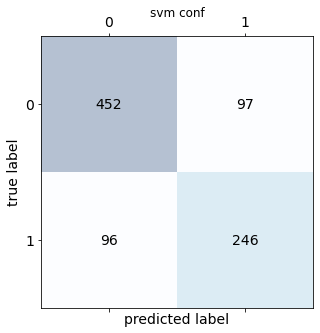

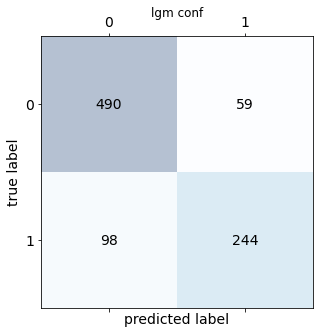

In [26]:
#カーネルsvmパラメータ設定
param_range=[0.0001,0.001,0.01,0.1,1,10,100,1000]
params_svm={'C':param_range,'gamma':param_range,'kernel':["rbf"]}

#k分割
k=4
#グループｋ交差検証
#gkf=GroupKFold(n_splits=4)
#層別ｋ交差検証
skf=StratifiedKFold(n_splits=k)

#予測データのリストを格納
y_val_svm=[]
y_val_lgb=[]

#予測データの精度を格納
validation_rate_svm=[]
validation_rate_lgm=[]

#lgbパラメータ設定
params_lgm = {
    'objective': 'binary',
    'max_bin': 300,
    'learning_rate': 0.05,
    'num_leaves': 40
}

#各精度評価変数の設定
ac_svm=copy.deepcopy(ac_variable())
ac_lgb=copy.deepcopy(ac_variable())

#交差検証の回数
count=0

#ループ内のtrain,testは交差検証のトレーニング、テストデータ
#コンペのテストデータはnp_x_test
for train_index,test_index in skf.split(x_train,y_train):
#for train_index,test_index in gkf.split(np_x_train,np_y_train,groups=group):
    x_tr,x_te=x_train.iloc[train_index],x_train.iloc[test_index]
    y_tr,y_te=y_train.iloc[train_index],y_train.iloc[test_index]
    
    #gridサーチsvm
    gs=GridSearchCV(estimator=SVC(),param_grid=params_svm,cv=k)
    gs.fit(x_tr,y_tr)
    print(gs.best_params_)
    y_pred=gs.predict(x_te)
    y_pred = (y_pred > 0.5).astype(int)
    ac_svm=accurate(y_te,y_pred,ac_svm)
    y_val_svm.append(gs.predict(x_test)*ac_svm.accuracy)
    
    #lgb
    lgb_train = lgb.Dataset(x_tr, y_tr,
                            categorical_feature=categorical_features)
    lgb_eval = lgb.Dataset(x_te,y_te,reference=lgb_train,
                           categorical_feature=categorical_features)

    model = lgb.train(params_lgm, lgb_train,
                                   valid_sets=[lgb_train, lgb_eval],
                                   verbose_eval=10,
                                   num_boost_round=1000,
                                   early_stopping_rounds=10)
    y_pred = model.predict(x_te, num_iteration=model.best_iteration)
    y_pred = (y_pred > 0.5).astype(int)
    ac_lgb=accurate(y_te,y_pred,ac_lgb)
    y_val_lgb.append(model.predict(x_test)*ac_lgb.accuracy)
    
    count+=1
    
print('svm accuracies')
print(ac_svm.accuracies)
conf("svm conf",ac_svm.all_confmat)

print('lgm accuracies')
print(ac_lgb.accuracies)
conf("lgm conf",ac_lgb.all_confmat)

In [27]:
y_sub=[[0]*len(x_test)]
for y in y_val_svm:
    y_sub+=y
for y in y_val_lgb:
    y_sub+=y
y_sub=y_sub/(sum(ac_svm.accuracies)+sum(ac_lgb.accuracies))

In [28]:
y_sub= (y_sub > 0.5).astype(int)
y_sub=y_sub[0]

In [29]:
y_sub

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

[0.937799043062201]


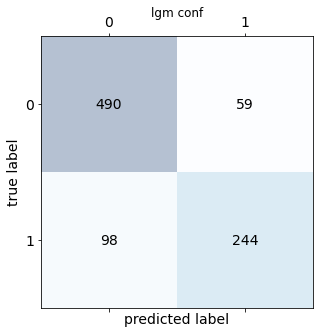

In [30]:
gender_submission=pd.read_csv("../input/titanic/gender_submission.csv")
y_test=gender_submission['Survived']
ac_sub=copy.deepcopy(ac_variable())
accurate(y_test,y_sub,ac_sub)
print(ac_sub.accuracies)
conf("lgm conf",ac_lgb.all_confmat)

In [41]:
test

,Pclass,Sex,Age,Fare,Family
0,3,0,34.5,7.8292,1
1,3,1,47.0,7.0000,2
2,2,0,62.0,9.6875,1
3,3,0,27.0,8.6625,1
4,3,1,22.0,12.2875,3
...,...,...,...,...,...
413,3,0,44.0,8.0500,1
414,1,1,39.0,108.9000,1
415,3,0,38.5,7.2500,1
416,3,0,44.0,8.0500,1


ｃｓｖ作成

In [43]:
submit=pd.DataFrame();

#列名を設定
columns=['PassengerId','Survived']
submit['PassengerId']=train.index.values
submit['Survived']=y_sub
        
submit.to_csv('../output/titanic/submission.csv',index=False)

ValueError: Length of values does not match length of index

In [34]:
submit

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0
